# **ElasticNet Regresyon**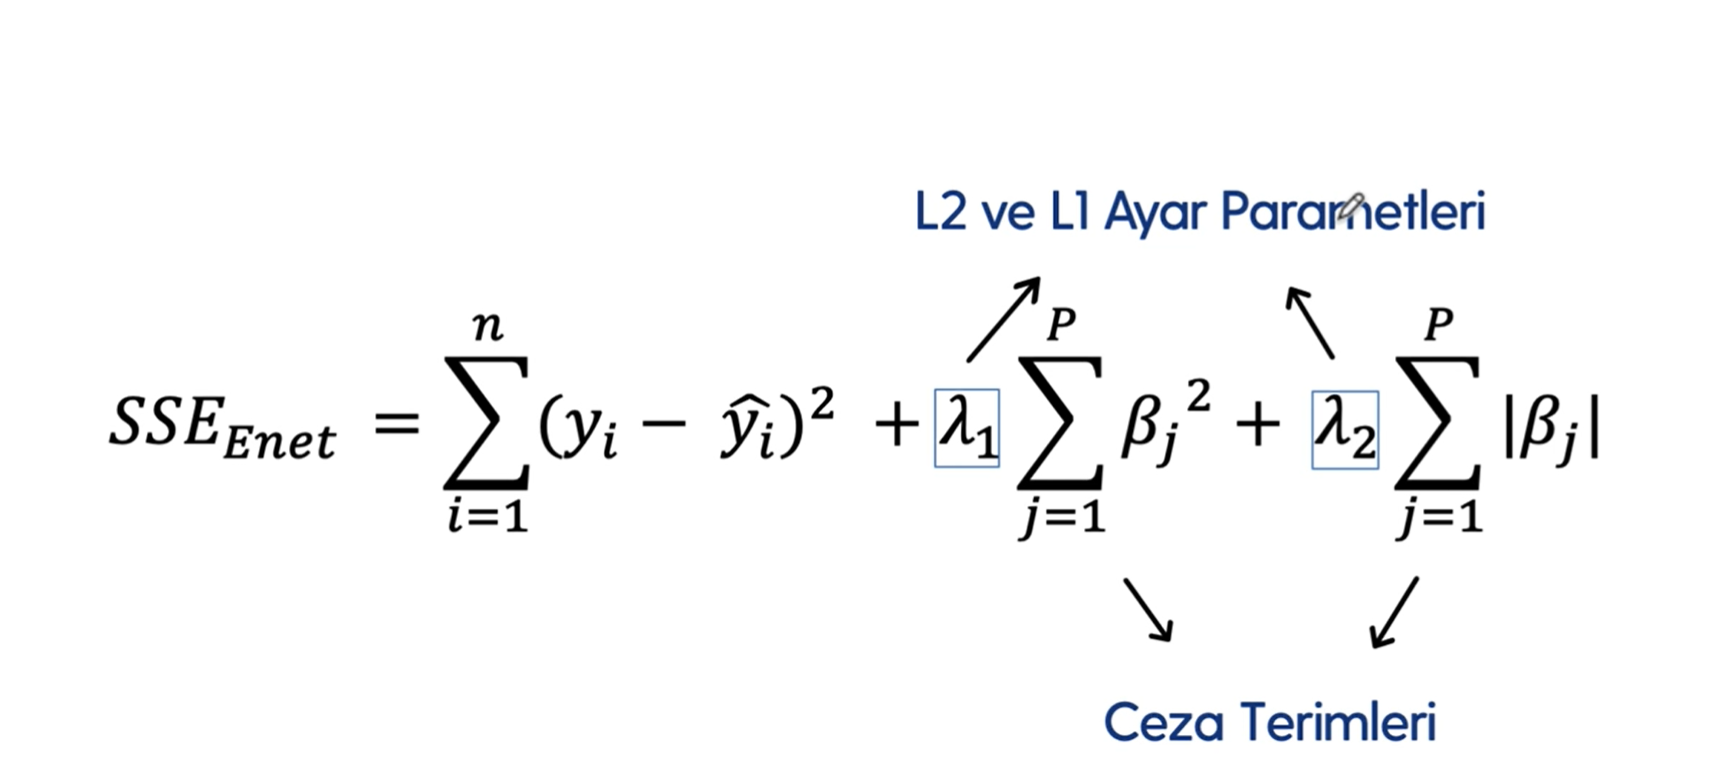

**Amaç: Hata kareler toplamını minimize eden katsayıları bu katsayılara bir ceza uygulayarak bulmaktır.**

ElasticNet L1 ve L2 yaklaşımlarını birleştirir.


# **Gerekli Kütüphaneler**

In [7]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn import model_selection
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
from sklearn.model_selection import cross_val_score

# **Veri Seti**

In [3]:
df = pd.read_csv('/content/Hitters.csv')
df=df.dropna() #İçerisindeki boş değerleri kaldırdık
dms= pd.get_dummies(df[['League','Division','NewLeague']]) #Kategorik değişkenleri dummie değişkene çevirdik. (One-hot encoding)
y = df['Salary']
x_ = df.drop(['Salary','League','Division','NewLeague'],axis=1).astype('float64') #Kategorik ve bağımlı değişkenleri atıyoruz ve bağımsız değişkenleri elde ediyoruz
x = pd.concat([x_,dms[['League_N','Division_W','NewLeague_N']]],axis=1) #Oluşturduğumuz dummieler ile bağımsız değişkenlerimizi bir araya getiriyoruz.

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.25,
                                                    random_state=42)

df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.0,N
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.0,A
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.0,N
4,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.5,N
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.0,A


In [4]:
df.shape


(263, 20)

# ***Bu kısımda veri manipülasyonui, keşifçi veri analizi yapılması gerekmektedir.***

# **ElasticNet Fonksiyonu**

In [9]:
enet_model = ElasticNet().fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.488e+06, tolerance: 3.899e+03
  model = cd_fast.enet_coordinate_descent(


In [12]:
enet_model.coef_ #katsayıları

array([ -1.86256172,   8.70489065,   5.10426375,  -2.89875799,
        -1.28642985,   5.24343682,   6.04480276,  -0.14701495,
        -0.21566628,  -0.7897201 ,   1.80813117,   0.80914508,
        -0.61262382,   0.26816203,   0.27172387,  -0.36530729,
        19.2186222 , -31.16586592,   8.98369938])

In [14]:
enet_model.intercept_ #Sabit

-6.465955602112331

# **Tahmin**

In [16]:
enet_model.predict(x_train)[0:10]

array([325.74706292, 776.06632333, 522.86508419, 107.64091955,
       449.03139566, 997.76095723,  99.78828622, 311.33763086,
       418.50335021, 879.9502608 ])

In [17]:
enet_model.predict(x_test)[0:10]

array([ 577.79111731,  617.33202224, 1031.39113156,  364.95861575,
        489.51894393,  300.74185842,  604.522666  ,  465.34678732,
        901.44473965,  703.20357123])

In [18]:
y_pred = enet_model.predict(x_test)

In [19]:
np.sqrt(mean_squared_error(y_test,y_pred))

357.1676548181246

In [20]:
r2_score(y_test,y_pred)

0.41070222469326867

# **Model Tuning**

In [22]:
enet_cv_model= ElasticNetCV(cv=5,random_state=0).fit(x_train,y_train) #on katlı cross validation yöntemiyle ve elasticnet cv ile modelimizi fit ettik.

In [23]:
enet_cv_model.alpha_

1295.7003652489486

In [24]:
enet_cv_model.intercept_

-53.94338554682213

In [25]:
enet_cv_model.coef_

array([ 0.54830166,  0.66796544,  0.        ,  0.        ,  0.        ,
        0.10866043,  0.        , -0.18888006,  0.4609844 ,  0.        ,
        0.61784373,  0.39129344,  0.0848276 ,  0.28780032,  0.05159175,
       -0.        ,  0.        , -0.        ,  0.        ])

# **Final Modeli**

In [28]:
enet_tuned = ElasticNet(alpha = enet_cv_model.alpha_).fit(x_train,y_train)

In [30]:
y_pred = enet_tuned.predict(x_test)

In [31]:
np.sqrt(mean_squared_error(y_test,y_pred))

378.592552146472